In [1]:
include("spde/spde_solvers.jl")
using .SPDE_Solvers
using Plots

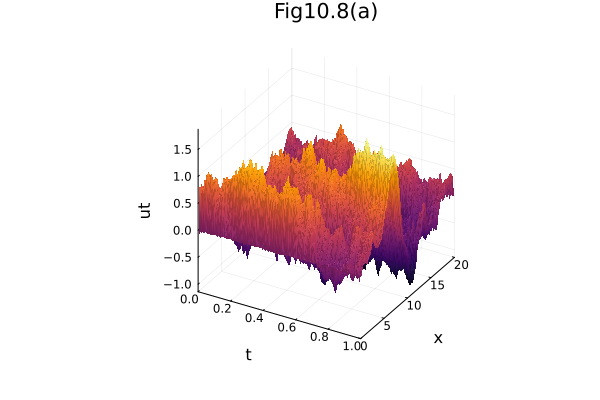

In [4]:
using Plots
using LinearAlgebra
using MeshGrid

# Define parameters
a = 20
J = 1024
x = range(0, a, length=J+1)
u0 = 1 ./ (1 .+ exp.(-(2 .- x) ./ sqrt(2)))

ell = 1
N = 1000
T = 1
epsilon = 1
sigma = 1

# Call the SPDE solver function (assuming you have implemented `spde_fd_n_exp`)
t, ut = finite_difference_with_exponent_covariance(u0, T, a, N, J, epsilon, sigma, ell, fNagumo)

# Note we do not downsample as the original example with rstride
# 3D Wireframe Plot
surface(t, x, ut; colorbar=false,
    xlabel="t", ylabel="x", zlabel="ut")
title!("Fig10.8(a)")


Examine the convergence of the white noise finit difference solution    

In [3]:
T = 0.1
epsilon = 0.1
sigma = 1.0
a = 1.0
M = Int(1e4)
J_vals = 4 .* 2 .^ [2, 3, 4]
N_vals = Int.(0.25 .* J_vals .^ 2)
v = zeros(length(N_vals))

for i in eachindex(J_vals)
    v[i] = l2_sq_mct(T, a, N_vals[i], J_vals[i], M, epsilon, sigma)
end

println(v)


[0.33576022477041384, 0.3434839520538238, 0.3472115455336287]


An example with the Allen-Cahn reacter term

UndefVarError: UndefVarError: `get_oned_bj` not defined in `Main`
Suggestion: check for spelling errors or missing imports.